In [0]:
import os
import time

# imports
import math
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression


# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

LOAD DATA


In [0]:
# Import Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from sqlalchemy import create_engine

In [0]:
from google.colab import files

uploaded = files.upload()

Saving books_sql.csv to books_sql (1).csv


In [0]:
books_df=pd.read_csv('books_sql.csv')

In [0]:
books_df.head()

,authors,category/genre,description,id_book,image_url,isbn,language,num_pages,published_date,publisher,sub_category,title,ratings_count,reviews_count,text_reviews_count,average_rating
0,['Stephen King'],Fiction,Returns to the rich landscape of Mid-World in ...,Nvkwjw2LToEC,http://books.google.com/books/content?id=Nvkwj...,9781451658903,en,309,,Simon and Schuster,fantasy,The Wind Through the Keyhole,62949,130610,5030,4.15
1,['Jill McCorkle'],Fiction,Jo Spencer's conventional life is disrupted wh...,ouTaAnG0ipwC,http://books.google.com/books/content?id=ouTaA...,9781565120013,en,400,,Algonquin Books,fiction,The Cheer Leader,473,884,36,3.71
2,['Jules Verne'],Fiction,Jules Verne: Die Kinder des Kapitän Grant. All...,ekDTBgAAQBAJ,http://books.google.com/books/content?id=ekDTB...,9783843030885,de,538,,BoD – Books on Demand,adventure,Die Kinder des Kapitän Grant,9954,17743,224,4.08
3,['Cathy Gillen Thacker'],Fiction,"With a busy career and three kids to feed, sin...",BtMwEKkGwowC,http://books.google.com/books/content?id=BtMwE...,9781426841453,en,224,,Harlequin,hoopla,A Baby for Mommy,70,177,9,3.51
4,['Edgar Wallace'],Fiction,Employing his unique style of innocent and end...,A4KYDQAAQBAJ,http://books.google.com/books/content?id=A4KYD...,9780755122684,en,190,,House of Stratus,fiction,Sanders,27,77,2,3.96


In [0]:
df_books=books_df[['id_book','title','authors','num_pages','ratings_count','reviews_count','text_reviews_count','average_rating']]
df_books.head()

,id_book,title,authors,num_pages,ratings_count,reviews_count,text_reviews_count,average_rating
0,Nvkwjw2LToEC,The Wind Through the Keyhole,['Stephen King'],309,62949,130610,5030,4.15
1,ouTaAnG0ipwC,The Cheer Leader,['Jill McCorkle'],400,473,884,36,3.71
2,ekDTBgAAQBAJ,Die Kinder des Kapitän Grant,['Jules Verne'],538,9954,17743,224,4.08
3,BtMwEKkGwowC,A Baby for Mommy,['Cathy Gillen Thacker'],224,70,177,9,3.51
4,A4KYDQAAQBAJ,Sanders,['Edgar Wallace'],190,27,77,2,3.96


In [0]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 8 columns):
id_book               1169 non-null object
title                 1169 non-null object
authors               1169 non-null object
num_pages             1169 non-null int64
ratings_count         1169 non-null int64
reviews_count         1169 non-null int64
text_reviews_count    1169 non-null int64
average_rating        1169 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 73.2+ KB


In [0]:
user_data=[(4,'Nvkwjw2LToEC', 'The Wind Through the Keyhole', "['Stephen King']","good", 4.15),
          (2,'ouTaAnG0ipwC', 'The Cheer Leader', "['Jill McCorkle']","moderate", 3.71),
           (10,'ekDTBgAAQBAJ', 'Die Kinder des Kapitän Grant', "['Jules Verne']", "good",4.08),
           (12,'YkZdNbGWQH4C', 'Stone Bleeding', "['Russell Mardell']","moderate", 4.0),
            (9,'pLNzDwAAQBAJ', 'Lock Every Door', "['Riley Sager']", "moderate",3.95),
           (11,'gGtjHYVu6cgC', 'Ordinary Beauty', "['Laura Wiess']","good", 4.19),
           (3,'2mgnEzzaJrIC', 'The Joy Luck Club', "['Amy Tan']","moderate",3.92),
          (11,'Nvkwjw2LToEC', 'The Wind Through the Keyhole', "['Stephen King']","good",4.15),
           (11,'S3K3UK09ZuoC', 'House Rules', "['Jodi Picoult']","good", 4.03),
           (9,'y3gghM_M8U0C', 'Mask Market', "['Andrew H. Vachss']", "moderate",3.81),
           (14,'YkZdNbGWQH4C', 'Stone Bleeding', "['Russell Mardell']", 4.0),
           (4,'qaKkenvL29UC','Harry Potter and the Half-Blood Prince',"['J.K. Rowling']","good",4.57),
           (12,'FzVjBgAAQBAJ', 'The Alchemist', "['Paulo Coelho']","moderate", 3.86),
          (11,'fz7FR5vcRPwC', 'The Alchemist', "['Ben Jonson']", "moderate",3.58),
           (6,'NVPpTEiSQEkC','A Briefer History of Time',"['Leonard Mlodinow', 'Stephen Hawking']","good",4.22),
           (9,'g1ZSDwAAQBAJ','Fantastic Beasts: The Crimes of Grindelwald - The Original Screenplay',"['J.K. Rowling']","good",4.11),
           (14,'bqiivgEACAAJ','Adventures of Sherlock Holmes',"['Arthur Conan Doyle', 'Gustav Hartenstein']","good",4.31),
           (2,'kti7vZn1DH0C', 'Macbeth', "['William Shakespeare']","moderate", 3.98),
            (2,'A2eMEGrq5msC',"A Midsummer Night's Dream","['William Shakespeare']","moderate",3.94)]

In [0]:
df_user=pd.DataFrame(user_data,columns=['user_id','id_book','title','authors','review','rating'])
df_user.head()

,user_id,id_book,title,authors,review,rating
0,4,Nvkwjw2LToEC,The Wind Through the Keyhole,['Stephen King'],good,4.15
1,2,ouTaAnG0ipwC,The Cheer Leader,['Jill McCorkle'],moderate,3.71
2,10,ekDTBgAAQBAJ,Die Kinder des Kapitän Grant,['Jules Verne'],good,4.08
3,12,YkZdNbGWQH4C,Stone Bleeding,['Russell Mardell'],moderate,4.00
4,9,pLNzDwAAQBAJ,Lock Every Door,['Riley Sager'],moderate,3.95


In [0]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
user_id    19 non-null int64
id_book    19 non-null object
title      19 non-null object
authors    19 non-null object
review     19 non-null object
rating     18 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.0+ KB


In [0]:
num_authors = len(df_books.authors.unique())
num_books = len(df_books.id_book.unique())
print('There are {} unique authors and {} unique books in this data set'.format(num_users, num_books))

There are 1020 unique authors and 1164 unique books in this data set


In [0]:
df_books['average_rating']=df_books['average_rating'].apply(lambda x:float(x)).apply(lambda x:round(x,1))
df_books.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id_book,title,authors,num_pages,ratings_count,reviews_count,text_reviews_count,average_rating
0,Nvkwjw2LToEC,The Wind Through the Keyhole,['Stephen King'],309,62949,130610,5030,4.2
1,ouTaAnG0ipwC,The Cheer Leader,['Jill McCorkle'],400,473,884,36,3.7
2,ekDTBgAAQBAJ,Die Kinder des Kapitän Grant,['Jules Verne'],538,9954,17743,224,4.1
3,BtMwEKkGwowC,A Baby for Mommy,['Cathy Gillen Thacker'],224,70,177,9,3.5
4,A4KYDQAAQBAJ,Sanders,['Edgar Wallace'],190,27,77,2,4.0


In [0]:
#count of each rating:

df_books_cnt=pd.DataFrame(df_books.groupby('average_rating').size(), columns=['count'])

In [0]:
# add log count
df_books_cnt['log_count'] = np.log(df_books_cnt['count'])
df_books_cnt

,count,log_count
average_rating,,
0.0,1,0.000000
2.5,2,0.693147
2.6,1,0.000000
2.8,3,1.098612
2.9,6,1.791759
3.0,14,2.639057
3.1,9,2.197225
3.2,17,2.833213
3.3,22,3.091042


Text(0, 0.5, 'number of ratings')

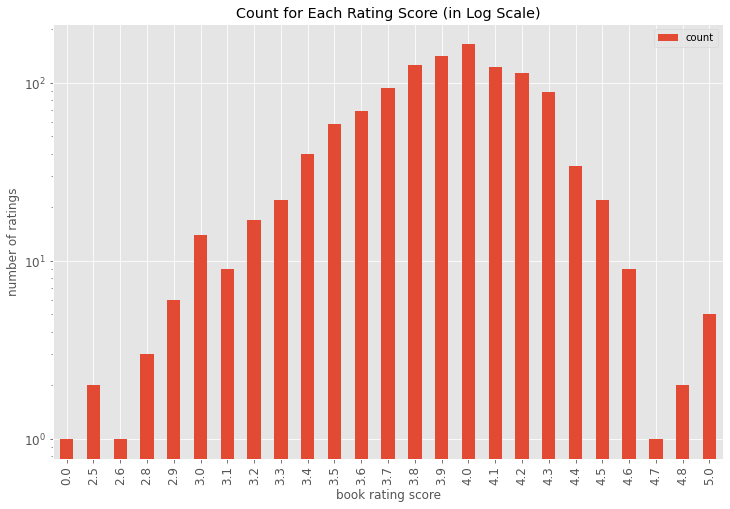

In [0]:
ax = df_books_cnt[['count']].reset_index().rename(columns={'index': 'average_rating'}).plot(
    x='average_rating',
    y='count',
    kind='bar',
    figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,
)
ax.set_xlabel("book rating score")
ax.set_ylabel("number of ratings")

In [0]:
# get rating frequency
df_cnt = df_books[['title','ratings_count']]
df_cnt=df_cnt.set_index('title')
df_cnt.head()

,ratings_count
title,
The Wind Through the Keyhole,62949
The Cheer Leader,473
Die Kinder des Kapitän Grant,9954
A Baby for Mommy,70
Sanders,27


Text(0, 0.5, 'number of ratings')

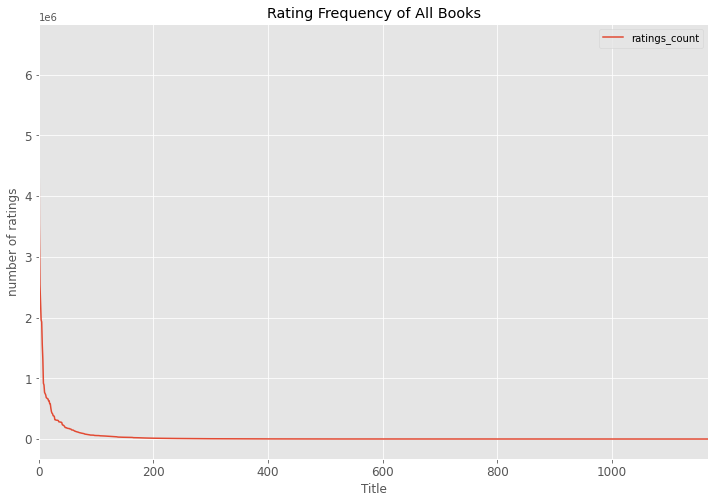

In [0]:
# plot rating frequency of all movies
ax = df_cnt.sort_values('ratings_count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Books',
        fontsize=12,
        )
ax.set_xlabel("Title")
ax.set_ylabel("number of ratings")

Text(0, 0.5, 'number of ratings (log scale)')

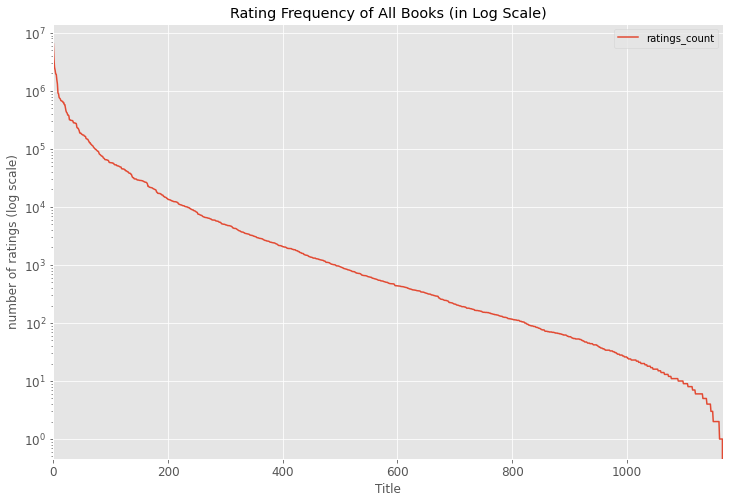

In [0]:
# plot rating frequency of all movies in log scale
ax = df_cnt \
    .sort_values('ratings_count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Books (in Log Scale)',
        fontsize=12,
        logy=True
    )
ax.set_xlabel("Title")
ax.set_ylabel("number of ratings (log scale)")

In [0]:
df_cnt['ratings_count'].quantile(np.arange(1, 0.4, -0.05))

1.00    6510753.0
0.95     148310.8
0.90      48895.2
0.85      20441.0
0.80       9955.6
0.75       5373.0
0.70       3123.8
0.65       1935.0
0.60       1217.6
0.55        760.2
0.50        488.0
0.45        342.0
Name: ratings_count, dtype: float64

In [0]:
# filter data
popularity_thres =1217
popular_books = list(set(df_cnt.query('ratings_count >= @popularity_thres').index))
df_books_drop = df_books[df_books.title.isin(popular_books)]
print('shape of original ratings data: ', df_books.shape)
print('shape of ratings data after dropping unpopular movies: ', df_books_drop.shape)

shape of original ratings data:  (1169, 8)
shape of ratings data after dropping unpopular movies:  (471, 8)


In [0]:
df_books_drop.head()

,id_book,title,authors,num_pages,ratings_count,reviews_count,text_reviews_count,average_rating
0,Nvkwjw2LToEC,The Wind Through the Keyhole,['Stephen King'],309,62949,130610,5030,4.2
2,ekDTBgAAQBAJ,Die Kinder des Kapitän Grant,['Jules Verne'],538,9954,17743,224,4.1
6,nIJEAwAAQBAJ,The Wyrmling Horde,['David Farland'],343,2390,4609,44,3.8
7,aS50KCRwCFQC,Shameless,['Anne Stuart'],411,2556,4405,224,3.9
9,pLNzDwAAQBAJ,Lock Every Door,['Riley Sager'],381,45228,141017,7489,4.0


Reshaping Data for Clustering

In [0]:
# pivot and create book-rating-no.of reviews matrix
trial = df_books_drop[['average_rating', 'ratings_count']]
data = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T


Elbow Curve method for the best way of finding the number of clusters for the data

Text(0.5, 1.0, 'Elbow Curve')

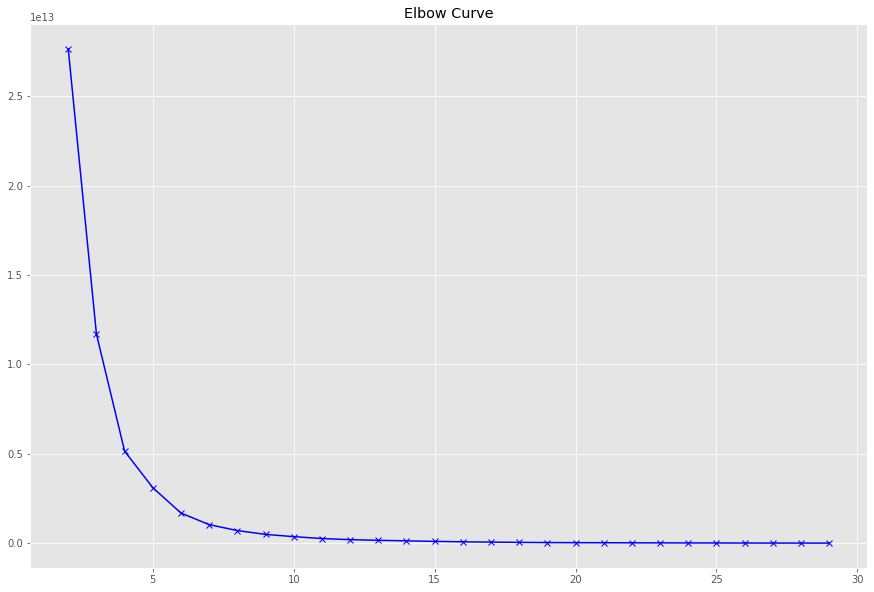

In [0]:
from sklearn.cluster import KMeans
X = data
distortions = []
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.title("Elbow Curve")

In [0]:
# define model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5, n_jobs=-1)
# fit
model_knn.fit(X)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=5, p=2, radius=1.0)

In [0]:
distance, indices = model_knn.kneighbors(data, )

In [0]:
def get_index_from_name(name):
    return df_books[df_books["title"]==name].index.tolist()[0]

all_books_names = list(df_books.title.values)

def get_id_from_partial_name(partial):
    for name in all_books_names:
        if partial in name:
            print(name,all_books_names.index(name))
            
def print_similar_books(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(df_books.iloc[id]["title"])
    if query:
        found_id = get_id_from_partial_name(query)
        for id in indices[found_id][1:]:
            print(df_books.iloc[id]["title"])

In [0]:
print_similar_books(query='Revolution')

Revolution 2020 172
The Fourth Revolution 534
Crime and Punishment in the Russian Revolution 965
Aristophanes' Male and Female Revolutions 1129


In [0]:
print_similar_books(id=5)

Revolution 2020
Love in Exile
The Woman in Cabin 10
Philoctetes


In [0]:
# define model
model_knn2 = NearestNeighbors(metric='euclidean', algorithm='kd_tree', n_neighbors=5, n_jobs=-1)
# fit
model_knn2.fit(X)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=-1, n_neighbors=5, p=2, radius=1.0)

In [0]:
distance, indices = model_knn2.kneighbors(data)

print_similar_books(id=5)

Revolution 2020
Love in Exile
The Woman in Cabin 10
Philoctetes


In [0]:
# define model#3
model_knn3 = NearestNeighbors(metric='euclidean', algorithm='ball_tree', n_neighbors=5, n_jobs=-1)
# fit
model_knn3.fit(X)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=-1, n_neighbors=5, p=2, radius=1.0)

In [0]:
distance, indices = model_knn3.kneighbors(data)

print_similar_books(id=5)

Revolution 2020
Love in Exile
The Woman in Cabin 10
Philoctetes


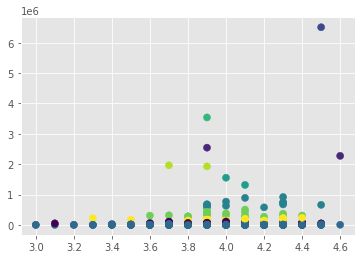

In [0]:
kmeans= KMeans(n_clusters=10)
kmeans.fit(X)
predicted_clusters=kmeans.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=predicted_clusters, s=50, cmap='viridis')